In [69]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import datetime
import mlbgame
import seaborn as sns

best_batters=['Jose Altuve','Charlie Blackmon','Daniel Murphy','Justin Turner',
             'Joey Votto','Buster Posey']

In [1]:
#  Uncomment this if you want to read and print the mlbstadium data from github.  Note:  GPS coordinates =
#  front door, not home plate.

#with open("C:\\Users\\bill_\\Desktop\\mlb_stadium.json") as json_data:
#  d = json.load(json_data)

#print d[0].keys()
#for team in d:
#    print team['team'],team['address'],team['lat'],team['lng']


In [7]:
#Dark Skies weather pull for Fenway.  Present time assumed (I think)

fenway_lat='42.346751'
fenway_lon='-71.096946'
get_weather_at='https://api.darksky.net/forecast/bce5271ecd9d923205cf59888ead3a5b/'\
+fenway_lat+','+fenway_lon
r=requests.get(get_weather_at)
#('https://api.darksky.net/forecast/bce5271ecd9d923205cf59888ead3a5b/fenway_lat,\
#fenway_lon)



#  Uncomment and run to look at json for Fenway
#print r.json()


In [5]:
print 'Weather at Fenway\n'
str_time= datetime.datetime.fromtimestamp(int("1284101485")
    ).strftime('%Y-%m-%d %H:%M:%S')
d=r.json()

# First hour in returned weather
print d['hourly']['data'][0],'\n'

#print d['hourly']['data'][46],'\n'


print 'date, time, precip,intensity,temp, windbearing, wind speed'

#print all hourly data until fail.  Note need to trap for missing data
#for dat in d['hourly']['data']:
#    str_time= datetime.datetime.fromtimestamp(dat['time']).\
#    strftime('%Y-%m-%d %H:%M:%S')
#    print dat['ozone'],str_time,dat['precipType'],dat['precipIntensity'],dat['temperature'],\
#    dat['windBearing'],dat['windSpeed']

Weather at Fenway

{u'ozone': 435.36, u'windGust': 12.88, u'temperature': 31.57, u'icon': u'clear-day', u'dewPoint': 17.83, u'humidity': 0.56, u'cloudCover': 0.08, u'summary': u'Clear', u'apparentTemperature': 24.3, u'pressure': 1000.6, u'windSpeed': 8.04, u'visibility': 10, u'time': 1521205200, u'windBearing': 284, u'precipIntensity': 0, u'uvIndex': 1, u'precipProbability': 0} 

date, time, precip,intensity,temp, windbearing, wind speed


In [ ]:
yankee_lat= 40.829189
yankee_lon=-73.926493

In [4]:
#  Grabs one game from mlbgame
month = mlbgame.games(2017,9)
games = mlbgame.combine_games(month)
september_game_ids=[]
for game in games:
    september_game_ids.append(game.game_id)
print len(september_game_ids)
print type(september_game_ids[0])

419
<type 'str'>


In [164]:
# Generate a list of all game ids across MLB from MAY through
# September.  Need more complicated filtering to get April and October

#  Note this only captures the game ids that you will need later.

yearly_game_ids=[]
for month in [5,6,7,8,9]:
    yearly_games = mlbgame.games(2017,month)
    games = mlbgame.combine_games(yearly_games)
    for game in games:
        yearly_game_ids.append(game.game_id)
    print 'done month',month
print len(yearly_game_ids),type(yearly_game_ids[0])

done month 5
done month 6
done month 7
done month 8
done month 9
2074 <type 'str'>


In [128]:

# This will get the complete play by play info in something that needs to 
#be decoded but could be very useful.
print type(september_game_ids[0]),september_game_ids[0]
game1_id=september_game_ids[0]
g2=mlbgame.game_events(game_id=game1_id)
g3=g2[0]
g4=mlbgame.data.get_game_events(game1_id)
for i in g3.top:
    print i.batter,i.event
    
#  Uncomment this to look at the full page
#########################print g4.geturl()
#########################g4.readlines()

<type 'str'> 2017_09_01_phimlb_miamlb_1
514917 Walk
520471 Forceout
656555 Strikeout
571830 Single
596748 Strikeout


In [122]:
#Singe game example
#
# instantiate stats object, get number home batters, grab stats by team (home then away)

stats1=mlbgame.player_stats(game1_id)
print 'length of home_additional_batting:',len(stats1.home_additional_batting)
p1=stats1.home_additional_batting[0]
for p in stats1.home_additional_batting:
    o=mlbgame.overview(game_id=game1_id)
    print o.time_date,p.bis_avg,p.id,p.name,p.bat_order,p.ab,p.h

print '\nlength of away_additional_batting:',len(stats1.away_additional_batting)
for p in stats1.away_additional_batting:
    print o.time_date,o.away_time_zone,o.home_time_zone,p.bis_avg,p.id,p.name,p.bat_order,p.ab,p.h

length of home_additional_batting: 13
2017/09/01 7:10 0.25 400085 Suzuki, I 902 1 0
2017/09/01 7:10 0.263 500743 Rojas 801 0 0
2017/09/01 7:10 0.0 596071 Peters 900 2 0
2017/09/01 7:10 0.263 449107 Aviles 800 3 0
2017/09/01 7:10 0.276 592663 Realmuto 500 4 0
2017/09/01 7:10 0.0 446899 Ziegler 903 0 0
2017/09/01 7:10 0.307 542303 Ozuna 400 4 0
2017/09/01 7:10 0.285 592885 Yelich 300 3 0
2017/09/01 7:10 0.212 454560 Ellis 700 3 1
2017/09/01 7:10 0.0 607457 Barraclough 901 0 0
2017/09/01 7:10 0.288 519317 Stanton 200 2 0
2017/09/01 7:10 0.333 605119 Anderson, B 600 3 1
2017/09/01 7:10 0.301 543829 Gordon, D 100 4 2

length of away_additional_batting: 15
2017/09/01 7:10 ET ET 0.333 465753 Florimon 700 3 1
2017/09/01 7:10 ET ET 0.0 593576 Neris 402 0 0
2017/09/01 7:10 ET ET 0.198 571841 Kelly 901 1 0
2017/09/01 7:10 ET ET 0.242 571830 Joseph, T 400 4 2
2017/09/01 7:10 ET ET 0.254 520471 Galvis 200 4 1
2017/09/01 7:10 ET ET 0.0 591693 Ramos, E 902 0 0
2017/09/01 7:10 ET ET 0.27 608384 Willia

In [135]:
o.game_nbr

1

In [147]:
# Allow simple efficiency calc in player dataframe using scalers and 
#trapping for missing values

def calc_eff(ab,hits):
    try:
        return float(hits)/ab
    except:
        return np.nan

In [170]:
#  Danger Will Robinson!  Danger!
#  This code is reliable but slow.
#  Included here for reference, but we should rewrite and make one pull that gets all
#  stats we need.

#  Suggest running next block that simply reads the datafile already gathered.


batting_df=pd.DataFrame(columns=['game_id','date_time','park','park_id','team','hm_aw',
                                 'player_name','player_id','bat_avg','bat_order',
                                 'ab','hits','eff'])

player_count=0  # doubles as artificial index for populating df,
                # should be removed after establishing df
    
successful_games=[]
num_players=[]
issues=[]
    
#two_game_ids=[yearly_game_ids[0],yearly_game_ids[1]]

for game in yearly_game_ids:
#for game in two_game_ids:
    
    try:

        stats1=mlbgame.player_stats(game)
        o=mlbgame.overview(game_id=game)

        hm_aw=1
        for p in stats1.home_additional_batting:
            batting_df.loc[player_count,'game_id']=game
            batting_df.loc[player_count,'date_time']=o.time_date
            batting_df.loc[player_count,'park']=o.venue
            batting_df.loc[player_count,'park_id']=o.venue_id    
            batting_df.loc[player_count,'team']=o.home_team_name
            batting_df.loc[player_count,'hm_aw']=hm_aw
            batting_df.loc[player_count,'player_name']=p.name_display_first_last
            batting_df.loc[player_count,'player_id']=p.id
            batting_df.loc[player_count,'bat_avg']=p.bis_avg
            batting_df.loc[player_count,'bat_order']=p.bat_order
            batting_df.loc[player_count,'ab']=p.ab
            batting_df.loc[player_count,'hits']=p.h
            player_count+=1

        hm_aw=0
        for p in stats1.away_additional_batting:
            batting_df.loc[player_count,'game_id']=game
            batting_df.loc[player_count,'date_time']=o.time_date
            batting_df.loc[player_count,'park']=o.venue
            batting_df.loc[player_count,'park_id']=o.venue_id
            batting_df.loc[player_count,'team']=o.away_team_name
            batting_df.loc[player_count,'hm_aw']=hm_aw
            batting_df.loc[player_count,'player_name']=p.name_display_first_last
            batting_df.loc[player_count,'player_id']=p.id
            batting_df.loc[player_count,'bat_avg']=p.bis_avg
            batting_df.loc[player_count,'bat_order']=p.bat_order
            batting_df.loc[player_count,'ab']=p.ab
            batting_df.loc[player_count,'hits']=p.h
            player_count+=1
        successful_games.append(game)
        num_players.append(player_count)
    
    except:
        print 'Issue with',game
        issues.append(game)
        
batting_df['eff']=batting_df.apply((lambda x: calc_eff(x.ab,x.hits)),axis=1)

Issue with 2017_05_03_milmlb_slnmlb_1
Issue with 2017_05_04_clemlb_detmlb_1
Issue with 2017_05_07_lanmlb_sdnmlb_1
Issue with 2017_05_10_minmlb_chamlb_1
Issue with 2017_05_12_phimlb_wasmlb_1
Issue with 2017_05_13_houmlb_nyamlb_1
Issue with 2017_05_20_kcamlb_minmlb_1
Issue with 2017_05_20_milmlb_chnmlb_1
Issue with 2017_05_25_kcamlb_nyamlb_1
Issue with 2017_05_25_cinmlb_clemlb_1
Issue with 2017_05_26_detmlb_chamlb_2
Issue with 2017_07_28_colmlb_wasmlb_1
Issue with 2017_08_29_clemlb_nyamlb_1
Issue with 2017_08_29_atlmlb_phimlb_1
Issue with 2017_09_01_nynmlb_houmlb_1
Issue with 2017_09_06_nyamlb_balmlb_1


In [8]:
batting_df=pd.read_csv("batting_df.csv")

In [9]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59915 entries, 0 to 59914
Data columns (total 14 columns):
Unnamed: 0     59915 non-null int64
game_id        59915 non-null object
date_time      59915 non-null object
park           59915 non-null object
park_id        59915 non-null int64
team           59915 non-null object
hm_aw          59915 non-null int64
player_name    59915 non-null object
player_id      59915 non-null int64
bat_avg        59915 non-null float64
bat_order      59915 non-null int64
ab             59915 non-null int64
hits           59915 non-null int64
eff            42655 non-null float64
dtypes: float64(2), int64(7), object(5)
memory usage: 6.4+ MB


In [10]:
print batting_df.head(5)
print batting_df.tail(5)

   Unnamed: 0                     game_id        date_time           park  \
0           0  2017_05_01_milmlb_slnmlb_1  2017/05/01 8:15  Busch Stadium   
1           1  2017_05_01_milmlb_slnmlb_1  2017/05/01 8:15  Busch Stadium   
2           2  2017_05_01_milmlb_slnmlb_1  2017/05/01 8:15  Busch Stadium   
3           3  2017_05_01_milmlb_slnmlb_1  2017/05/01 8:15  Busch Stadium   
4           4  2017_05_01_milmlb_slnmlb_1  2017/05/01 8:15  Busch Stadium   

   park_id       team  hm_aw     player_name  player_id  bat_avg  bat_order  \
0     2889  Cardinals      1      Matt Adams     571431    0.286        901   
1     2889  Cardinals      1   Seung Hwan Oh     493200    0.000        905   
2     2889  Cardinals      1   Yadier Molina     425877    0.263        600   
3     2889  Cardinals      1  Randal Grichuk     545341    0.250        700   
4     2889  Cardinals      1  Kevin Siegrist     543779    0.000        903   

   ab  hits  eff  
0   1     1  1.0  
1   0     0  NaN  
2   5

In [173]:
#  Careful if you uncomment.  This overwrites existing datafile.
#batting_df.to_csv('batting_df.csv')

In [18]:
batting_df=pd.read_csv('batting_df.csv')

In [11]:
batting_df.describe()

,Unnamed: 0,park_id,hm_aw,player_id,bat_avg,bat_order,ab,hits,eff
count,59915.000000,59915.000000,59915.000000,59915.000000,59915.000000,59915.000000,59915.000000,59915.000000,42655.000000
mean,29957.000000,1381.945623,0.503864,533455.454227,0.192743,641.694784,2.330034,0.597763,0.243838
std,17296.115026,1586.369431,0.499989,72665.483230,0.128287,317.537594,1.815890,0.841159,0.264732
min,0.000000,1.000000,0.000000,112526.000000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,14978.500000,12.000000,0.000000,471083.000000,0.029500,400.000000,0.000000,0.000000,0.000000
50%,29957.000000,32.000000,1.000000,543272.000000,0.240000,700.000000,3.000000,0.000000,0.250000
75%,44935.500000,2681.000000,1.000000,593700.000000,0.276000,901.000000,4.000000,1.000000,0.400000
max,59914.000000,4705.000000,1.000000,669720.000000,1.000000,1111.000000,9.000000,5.000000,1.000000


In [175]:

#  These games were rescheduled and need to be checked to see if they are in the DB
print issues

['2017_05_03_milmlb_slnmlb_1', '2017_05_04_clemlb_detmlb_1', '2017_05_07_lanmlb_sdnmlb_1', '2017_05_10_minmlb_chamlb_1', '2017_05_12_phimlb_wasmlb_1', '2017_05_13_houmlb_nyamlb_1', '2017_05_20_kcamlb_minmlb_1', '2017_05_20_milmlb_chnmlb_1', '2017_05_25_kcamlb_nyamlb_1', '2017_05_25_cinmlb_clemlb_1', '2017_05_26_detmlb_chamlb_2', '2017_07_28_colmlb_wasmlb_1', '2017_08_29_clemlb_nyamlb_1', '2017_08_29_atlmlb_phimlb_1', '2017_09_01_nynmlb_houmlb_1', '2017_09_06_nyamlb_balmlb_1']


In [12]:
trout=batting_df[batting_df['player_name']=='Mike Trout']
trout.head()

,Unnamed: 0,game_id,date_time,park,park_id,team,hm_aw,player_name,player_id,bat_avg,bat_order,ab,hits,eff
713,713,2017_05_02_anamlb_seamlb_1,2017/05/02 10:10,Safeco Field,680,Angels,0,Mike Trout,545361,0.363,300,3,1,0.333333
837,837,2017_05_03_anamlb_seamlb_1,2017/05/03 10:10,Safeco Field,680,Angels,0,Mike Trout,545361,0.358,300,4,1,0.250000
1836,1836,2017_05_05_houmlb_anamlb_1,2017/05/05 10:07,Angel Stadium of Anaheim,1,Angels,1,Mike Trout,545361,0.355,300,4,1,0.250000
3987,3987,2017_05_11_detmlb_anamlb_1,2017/05/11 10:07,Angel Stadium of Anaheim,1,Angels,1,Mike Trout,545361,0.342,300,4,0,0.000000
4185,4185,2017_05_12_detmlb_anamlb_1,2017/05/12 10:07,Angel Stadium of Anaheim,1,Angels,1,Mike Trout,545361,0.336,200,5,1,0.200000


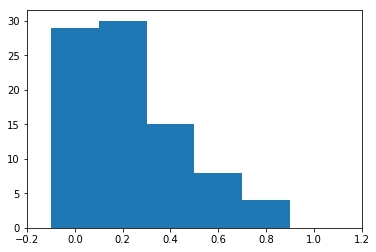


Trout played in  86 games
He had 301 at bats with 86 hits
He got zero hits in 33.7 percent of his games


In [13]:

pile=plt.hist(trout.eff,bins=5)
plt.close()
pile1=np.array(5)
pile1=pile[0]/trout.eff.count()
plt.hist(trout.eff,bins=5,align='left')
plt.xlim(-0.2,1.2)
plt.show()
plt.close()
print ''
print "Trout played in ",trout.eff.count(),'games'
print "He had",trout.ab.sum(),'at bats with',trout.hits.sum(),"hits"
print "He got zero hits in %3.1f percent of his games"%(pile1[0]*100)

C:\Users\bill_\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


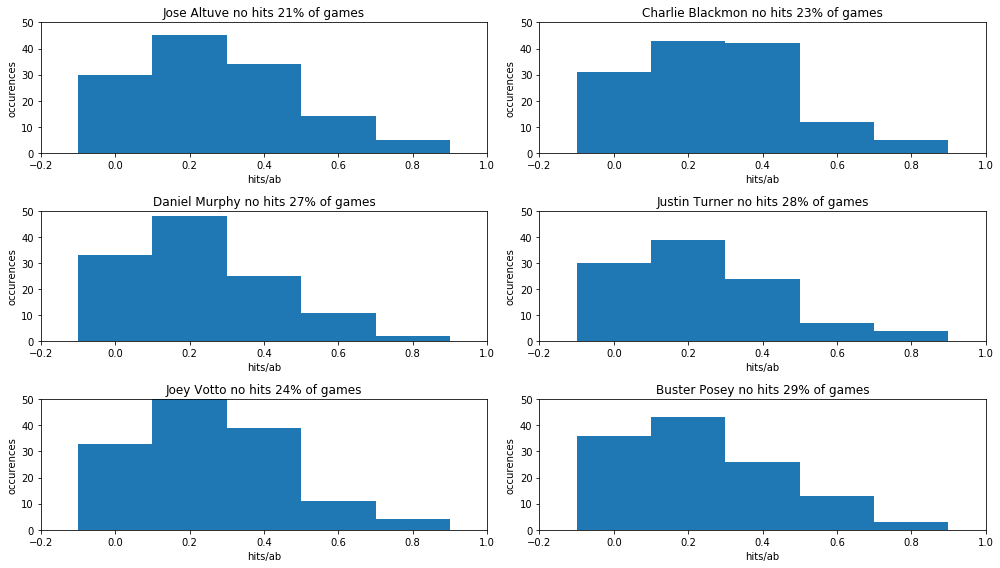

In [15]:
# Pick some of the top guys, take a look



plt.close()
fig = plt.figure(figsize=(14,8))

batter_count=1
for b in best_batters:
   
    best_b=batting_df[batting_df['player_name']==b]
    best_b.dropna(axis=0,inplace=True)

    pile1=np.sum(best_b.hits==0)/float(best_b.hits.count())
    
    ax=plt.subplot(3,2,batter_count)
    ax=plt.hist(best_b.eff,bins=5,align='left',)
    
    plt.xlim(-0.2,1.0)
    tmp=int(pile1*1000)/10
    xlab=b+" no hits "+str(tmp)+'% of games'
    plt.xlabel("hits/ab")
    plt.ylabel("occurences")
    plt.ylim(0,50)
    plt.title(xlab)    
    batter_count+=1
    plt.tight_layout()
    print ''

plt.savefig('Top 6 Batters.png')
plt.show()
plt.close()
print ''
    

 
ab      2     3     4    5    6
hits                           
0     5.0   3.0  19.0  1.0  NaN
1     2.0  11.0  29.0  5.0  2.0
2     NaN   7.0  20.0  4.0  NaN
3     NaN   1.0   7.0  8.0  NaN
4     NaN   NaN   1.0  3.0  NaN


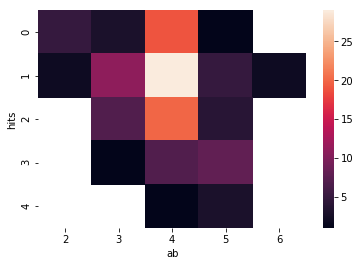

In [68]:
ab=batting_df.ab
hits=batting_df.hits
batting_df['wif_games']=batting_df.hits.apply(lambda x: 0 if x>0 else 1)
#batting_df.drop('Unnamed: 0',axis=1,inplace=True)
batting_df.dropna(axis=0, inplace=True)

hitters=batting_df[batting_df['player_name']=='Jose Altuve']
hitters=hitters.loc[:,['ab','hits','wif_games']]
hitters.reset_index(drop=True,inplace=True)
hitters=hitters.pivot_table(columns="ab", index="hits", values="wif_games",aggfunc='count')
#print hitters.head()
ax = sns.heatmap(hitters)
#plt.show()

print' '
hitters=batting_df[batting_df['player_name']=='Jose Altuve']
hitters=hitters.loc[:,['ab','hits','wif_games']]
hitters.reset_index(drop=True,inplace=True)
da_guy=hitters.pivot_table(columns="ab", index="hits", values="wif_games",aggfunc='count')

#bob=hitters.groupby('ab').count()
print da_guy

Jose Altuve


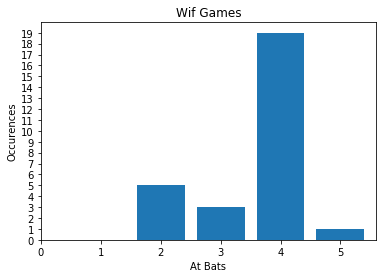

		At Bats/game
              2     3     4     5    6
games         7    22    76    21    2
wif_games     5     3    19     1  NaN
wif_per    0.71  0.13  0.25  0.04  NaN 

Charlie Blackmon


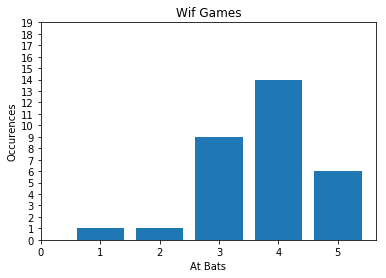

		At Bats/game
           1    2     3     4     5    6
games      1    2    27    66    34    3
wif_games  1    1     9    14     6  NaN
wif_per    1  0.5  0.33  0.21  0.17  NaN 

Daniel Murphy


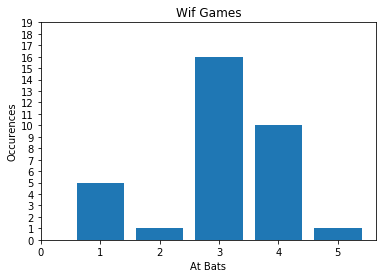

		At Bats/game
              1     2     3     4     5    6
games         6     3    38    59    12    1
wif_games     5     1    16    10     1  NaN
wif_per    0.83  0.33  0.42  0.16  0.08  NaN 

Justin Turner


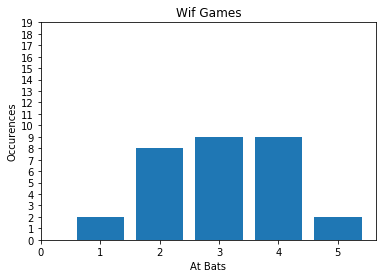

		At Bats/game
             1    2     3    4     5
games        4   10    32   43    15
wif_games    2    8     9    9     2
wif_per    0.5  0.8  0.28  0.2  0.13 

Joey Votto


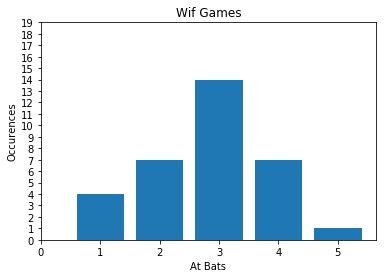

		At Bats/game
             1     2     3     4     5    8
games        5    18    50    48    15    1
wif_games    4     7    14     7     1  NaN
wif_per    0.8  0.38  0.28  0.14  0.06  NaN 

Buster Posey


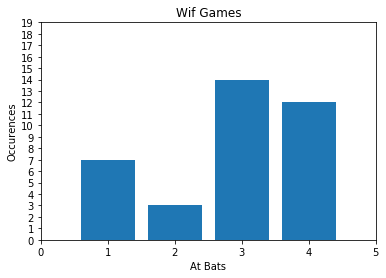

		At Bats/game
              1    2     3     4    5    7
games         9    6    34    56   15    1
wif_games     7    3    14    12  NaN  NaN
wif_per    0.77  0.5  0.41  0.21  NaN  NaN 



In [135]:
#  Look at the best hitters, map at bats, number of hits, and wif games

player_summary=[]

for b in best_batters:
    hitters=batting_df[batting_df['player_name']== b]
    hitters=hitters.loc[:,['ab','hits','wif_games']]
    hitters.reset_index(drop=True,inplace=True)
    
    da_guy=hitters.pivot_table(columns="ab", index="hits", values="wif_games",aggfunc='count')
    #print b
    #print da_guy,'\n'
    ab_holder=np.array(da_guy.columns)
    
    ab_tots=da_guy.sum()
    ab_bins=da_guy.iloc[0,:]/ab_tots
    
    cols=len(ab_holder)
    player_summary=pd.DataFrame(columns=ab_holder,index=['games','wif_games','wif_per'],)

    for c in player_summary.columns:
        player_summary.loc['games',c]=ab_tots[c]
        
        try:
            player_summary.loc['wif_games',c]=da_guy.loc[0,c]
        except:
            pass
        
        try:
            player_summary.loc['wif_per',c]=int(ab_bins[c]*100)/float(100)
        except:
            pass

    print b
    plt.bar(ab_holder,player_summary.loc['wif_games',:])
    plt.xticks(range(6))
    plt.yticks(range(20))
    plt.xlabel('At Bats')
    plt.ylabel('Occurences')
    plt.title('Wif Games')
    plt.show()

    print '\t\tAt Bats/game'
    print player_summary,'\n'
